In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import notebook_utils as utils

In [4]:
folder = "../results/vary_lambda_q/"

combos = pd.read_csv(f"../lambda_q_combinations.txt", sep= "\t", header = None)
lambdas = np.unique(combos[0])
qs = np.unique(1/combos[1])

The following generates the line plots comparing the theoretical bounds and simulated ks over various values of λ and q for figure 3.

/data/yosef2/users/richardz/anaconda2/envs/python3_6/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


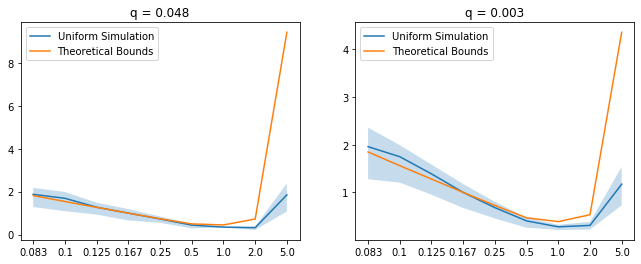

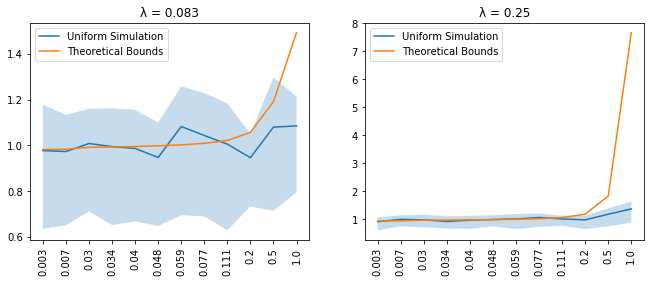

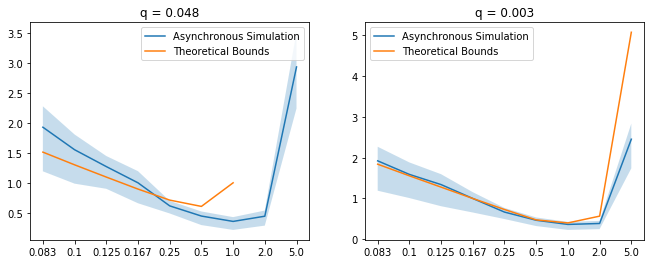

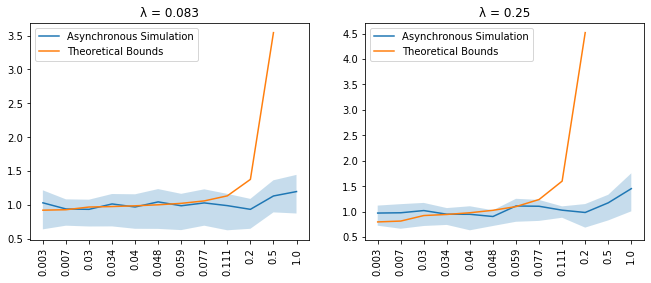

In [12]:
regimes = ["complete_binary", "exponential_plus_c"]
legs = ["Uniform", "Asynchronous"]
ells = [1/9, 0.05]
n=256
margin = 0.9999

for ind in range(2):
    
    regime = regimes[ind]
    ell = ells[ind]
    leg = legs[ind]
    
    df = pd.read_csv(f"{folder}{regime}/shared_mutation_rf.txt", sep= "\t", header = None)
    df = df.drop(columns = [3]).rename(columns = {4:3})
    spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()
    spline_df.columns = ["value"]
    pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
    pivot_table.index = [round(i, 3) for i in pivot_table.index]
    pivot_table.columns = [round(i, 3) for i in pivot_table.columns]
    
    lb_arr = []
    
    if ell == 1/9:
        c = 1/9
    elif ell == 0.05:
        c = (np.log(1 - margin) / -23.697339506322916 + ell)**2 / ell

    for q in pivot_table.index:
        row = []
        for p in pivot_table.columns:
            row.append(utils.bottom_up_theory_bound(p,q,ell,n,c, 0.1))
        lb_arr.append(row)

    lb_arr_df = pd.DataFrame(lb_arr)
    lb_arr_df.index = pivot_table.index
    lb_arr_df.columns = pivot_table.columns
    
    fig, axs = plt.subplots(1, 2)
    fig.set_figheight(4)
    fig.set_figwidth(11)
    q_vals = [1/21, 1/300]

    for x in range(2):
        q_val = q_vals[x]
        temp_table = df[np.isclose(df[0], q_val)]
        lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
        uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
        ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
        axs[x].plot([i/np.nanmedian(ks) for i in ks])
        axs[x].fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.25)
        axs[x].plot([i/np.nanmedian(list(lb_arr_df.loc[round(q_val, 3)])) for i in list(lb_arr_df.loc[round(q_val, 3)])])

        axs[x].set_xticks(np.arange(len(pivot_table.columns)))
        axs[x].set_xticklabels(pivot_table.columns)
        axs[x].set_title("q = " + str(round(q_val, 3)))
        axs[x].legend([f"{leg} Simulation", "Theoretical Bounds"])
    plt.savefig(f"../Figures/Fig3/line_plots/{regime}_comp_q", format='pdf')
    plt.show()
    
    fig, axs = plt.subplots(1,2)
    fig.set_figheight(4)
    fig.set_figwidth(11)
    lamb_vals = [1/12, 0.25]

    for x in range(2):
        lamb_val = lamb_vals[x]
        temp_table = df[np.isclose(df[1], lamb_val)]
        lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
        uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
        ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
        axs[x].plot([i/np.nanmedian(ks) for i in ks])
        axs[x].fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.25)
        axs[x].plot([i/np.nanmedian(list(lb_arr_df.loc[:,round(lamb_val, 3)])) for i in list(lb_arr_df.loc[:,round(lamb_val, 3)])])

        axs[x].set_xticks(np.arange(len(pivot_table.index)))
        axs[x].set_xticklabels(pivot_table.index, rotation = 90)
        axs[x].set_title("λ = " + str(round(lamb_val, 3)))
        axs[x].legend([f"{leg} Simulation", "Theoretical Bounds"])
    plt.savefig(f"../Figures/Fig3/line_plots/{regime}_comp_lamb", format='pdf')
    plt.show()

The following generates the line plots comparing the theoretical bounds and simulated ks over various values of λ and q for figure 2.

/data/yosef2/users/richardz/projects/theoretical_lineage_tracing_reproducibility/notebooks/notebook_utils.py:32: RuntimeWarning: divide by zero encountered in log
  val = 1/(2*p) * np.log((1-q)/q) + 1


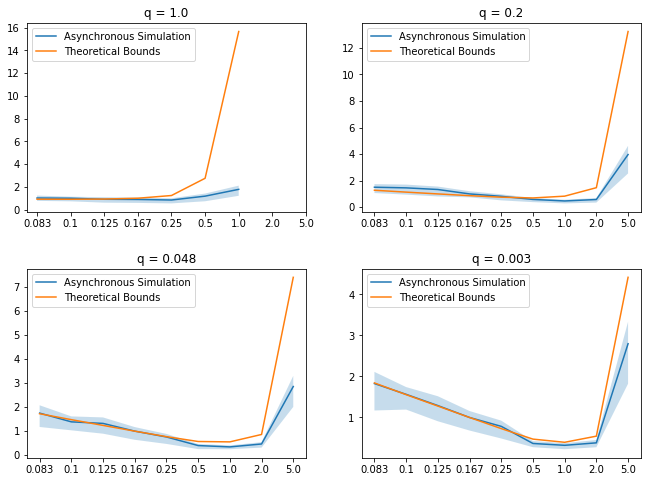

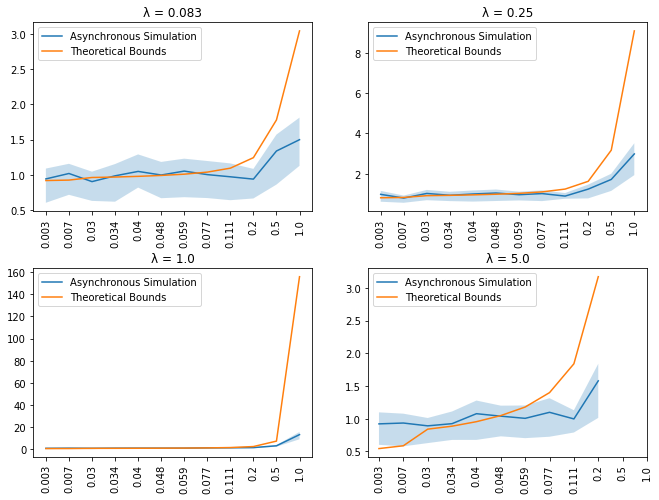

In [16]:
ell = 0.05
n=256
    
df = pd.read_csv(f"{folder}exponential_plus_c/percolation_rf.txt", sep= "\t", header = None)
df = df.drop(columns = [3]).rename(columns = {4:3})
spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()
spline_df.columns = ["value"]
pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
pivot_table.index = [round(i, 3) for i in pivot_table.index]
pivot_table.columns = [round(i, 3) for i in pivot_table.columns]

lb_arr = []

for q in pivot_table.index:
    row = []
    for p in pivot_table.columns:
        row.append(utils.top_down_theory_bound(p, q, ell, n, 1.0, 0.1))
    lb_arr.append(row)

lb_arr_df = pd.DataFrame(lb_arr)
lb_arr_df.index = pivot_table.index
lb_arr_df.columns = pivot_table.columns
lb_arr_df.loc[1.0, 5.0] = np.NaN
lb_arr_df.loc[1.0, 2.0] = np.NaN
lb_arr_df.loc[0.5, 5.0] = np.NaN

fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(11)
plt.subplots_adjust(hspace = 0.3)
q_vals = [1.0, 0.2, 1/21, 1/300]

for i in range(4):
    x, y = i//2, i%2
    q_val = q_vals[i]
    temp_table = df[np.isclose(df[0], q_val)]
    lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
    uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
    ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
    axs[x,y].plot([i/np.nanmedian(ks) for i in ks])
    axs[x,y].fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.25)
    axs[x,y].plot([i/np.nanmedian(list(lb_arr_df.loc[round(q_val, 3)])) for i in list(lb_arr_df.loc[round(q_val, 3)])])
    
    axs[x,y].set_xticks(np.arange(len(pivot_table.columns)))
    axs[x,y].set_xticklabels(pivot_table.columns)
    axs[x,y].set_title("q = " + str(round(q_val, 3)))
    axs[x,y].legend(["Asynchronous Simulation", "Theoretical Bounds"])
plt.savefig(f"../Figures/Fig2/line_plots/exponential_plus_c_comp_q", format='pdf')
plt.show()

fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(11)
plt.subplots_adjust(hspace = 0.3)
lamb_vals = [1/12, 0.25, 1.0, 5.0]

for i in range(4):
    x, y = i//2, i%2
    lamb_val = lamb_vals[i]
    temp_table = df[np.isclose(df[1], lamb_val)]
    lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
    uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
    ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
    if i == 3:
        uppers[10] = np.nan
        lowers[10] = np.nan
    axs[x,y].plot([i/np.nanmedian(ks) for i in ks])
    axs[x,y].fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.25)
    axs[x,y].plot([i/np.nanmedian(list(lb_arr_df.loc[:,round(lamb_val, 3)])) for i in list(lb_arr_df.loc[:,round(lamb_val, 3)])])
    
    axs[x,y].set_xticks(np.arange(len(pivot_table.index)))
    axs[x,y].set_xticklabels(pivot_table.index, rotation = 90)
    axs[x,y].set_title("λ = " + str(round(lamb_val, 3)))
    axs[x,y].legend(["Asynchronous Simulation", "Theoretical Bounds"])
plt.savefig(f"../Figures/Fig2/line_plots/exponential_plus_c_comp_lamb", format='pdf')
plt.show()

The following generates the line plots in figure 2 comparing the simulated ks for various values of d for the Threshold Algorithm. 

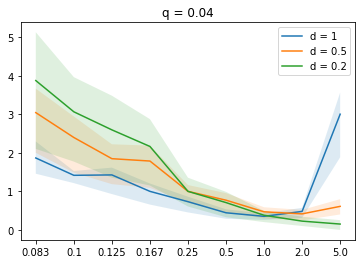

In [15]:
pt_1 = pd.read_csv(f"{folder}exponential_plus_c/percolation_rf.txt", sep= "\t", header = None)
pt_1 = pt_1.drop(columns = 3)
pt_1.columns = [0, 1, 2, 3]
pt_50 = pd.read_csv(f"{folder}exponential_plus_c/percolation_d_triplets.txt", sep= "\t", header = None)
pt_50 = pt_50.drop(columns = 3)
pt_50.columns = [0, 1, 2, 3]
pt_20 = pd.read_csv(f"{folder}exponential_plus_c/percolation_d_triplets_20.txt", sep= "\t", header = None)
pt_20 = pt_20.drop(columns = 3)
pt_20.columns = [0, 1, 2, 3]

q_val = 0.04

temp_table = pt_1[np.isclose(pt_1[0], q_val)]
lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
plt.plot([i/np.nanmedian(ks) for i in ks])
plt.fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.15)

temp_table = pt_50[np.isclose(pt_50[0], q_val)]
lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
plt.plot([i/np.nanmedian(ks) for i in ks])
plt.fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.15)

temp_table = pt_20[np.isclose(pt_20[0], q_val)]
lowers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_lower_bound).to_frame()[0])
uppers = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.find_upper_bound).to_frame()[0])
ks = list(temp_table.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()[0])
plt.plot([i/np.nanmedian(ks) for i in ks])
plt.fill_between(x = range(len(ks)), y1 = [i/np.nanmedian(ks) for i in lowers], y2 = [i/np.nanmedian(ks) for i in uppers], alpha = 0.15)


plt.xticks(np.arange(len(lambdas)), [round(i, 3) for i in lambdas])
plt.title("q = " + str(q_val))
plt.legend(["d = 1", "d = 0.5", "d = 0.2"])
plt.savefig(f"../Figures/Fig2/line_plots/exponential_plus_c_comp_d", format='pdf')
plt.show()

The following generates the line plots in figure 2 comparing the theoretical bounds for various values of d for the Threshold Algorithm. 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


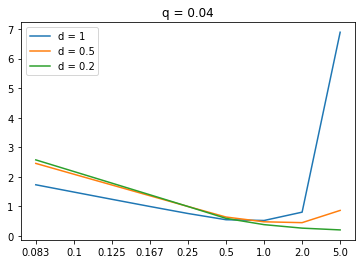

In [8]:
n=256
ell = 0.05

lb_arr = []
d = 1
for q in qs:
    row = []
    for p in lambdas:
        row.append(utils.top_down_theory_bound(p,q,ell,n, d, 0.1))
    lb_arr.append(row)
    
lb_df_1 = pd.DataFrame(lb_arr)
lb_df_1.index = [round(i, 3) for i in qs]
lb_df_1.columns = [round(i, 3) for i in lambdas]

lb_arr = []
d = 0.5
for q in qs:
    row = []
    for p in lambdas:
        row.append(utils.top_down_theory_bound(p,q,ell,n, d, 0.1))
    lb_arr.append(row)
    
lb_df_50 = pd.DataFrame(lb_arr)
lb_df_50.index = [round(i, 3) for i in qs]
lb_df_50.columns = [round(i, 3) for i in lambdas]

lb_arr = []
d = 0.2
for q in qs:
    row = []
    for p in lambdas:
        row.append(utils.top_down_theory_bound(p,q,ell,n, d, 0.1))
    lb_arr.append(row)
    
lb_df_20 = pd.DataFrame(lb_arr)
lb_df_20.index = [round(i, 3) for i in qs]
lb_df_20.columns = [round(i, 3) for i in lambdas]

q_val = 0.04
plt.plot([i/np.median(list(lb_df_1.loc[q_val])) for i in list(lb_df_1.loc[q_val])])
plt.plot([i/np.median(list(lb_df_50.loc[q_val])) for i in list(lb_df_50.loc[q_val])])
plt.plot([i/np.median(list(lb_df_20.loc[q_val])) for i in list(lb_df_20.loc[q_val])])
plt.xticks(np.arange(len(lambdas)), [round(i, 3) for i in lambdas])

plt.title("q = " + str(q_val))
plt.legend(["d = 1", "d = 0.5", "d = 0.2"])
plt.savefig(f"../Figures/Fig2/line_plots/theory_comp_d", format='eps')
plt.show()